# PHYS270 Assignment 10: ODEs and Runge-Kutta method

Consider ordinary differential equation

$$ \frac{d^2\!y}{dt^2}+4y=0$$

with initial conditions $y(0)=1$ and $y'(0)=0$. Obtain the numerical soluton of this equation in the interval from $t=0$ to $t=4$ with $0.1\%$ accuracy using

(**a**) the midpoint method (given by Eq. 25.37 of the book). Find the stepsize $\Delta t$ that yields the required accuracy. 

(**b**) the 3rd-order Runge-Kutta method (given by Eq. 25.39 in the book). Find the stepsize $\Delta t$ that yields the required accuracy.

(**c**) the 4th-order Runge-Kutta method (given by Eq. 25.40 in the book). Find the stepsize $\Delta t$ that yields the required accuracy.

(**d**) the 5th-order Runge-Kutta method (given by Eq. 25.41 in the book). Find the stepsize $\Delta t$ that yields the required accuracy.

(**e**) Provide an easy-to-understand plots of all the solutions (including the exact analytical solution) in one frame using the $\tt matplotlib$ library.

(**f**) Asses which method yields the required accuracy with the lowest computational cost. 

**Note:** The above equation numbers correspond to the 7th edition of the Chapra & Canale book. 

**Hint:** Since this equation has an exact analytical solution, you can measure the error of the numerical solution by calculating the the RMS difference between the numerical and the analytical solutions at every point of the numerical grade. 




#Abstract
This assignment is directed at numerical solving of Differential Equations of the second order using 4 methods. As a result, midpoint method and the Runge-Kutta method of different orders were compared. The comparison was based on the accuracy of methods and their computational costs. Basing on the results, the midpoint method could be claimed to be the most efficient, since it has a lower computational cost and achieves the same accuracy as other methods.

#Introduction
An ordinary differential equation of form

$$ \frac{d^2\!y}{dt^2}+4y=0$$
was given. The initial conditions for this equation were:
$$y(0) = 1$$
$$y'(0) = 0$$
It has a simple solution, which could be calculate by hand or using a CAS such as Methematica. The solution is :
$$y = cos(2*x)$$
In this assignment I will try to solve this ordinary differential equation using the midpoint method and Runge-Kutta method of 3rd, 4th and 5th orders. The methods will be evaluated basing on the time it takes them to achive the error rate of $0.1\%$. The error rate will be calculated as an average perent error on the interval [0, 4].

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable

In [ ]:
# first of all, the function for error should be calculated
def error(pred, sz=1000):
  interval = np.linspace(0, 4, sz)
  true = np.cos(2 * interval)
  return (np.abs((true - pred) / true)* 100).mean() 



#Methodology
##Midpoint method
This method attempts to find the next value of a function using its current value + a value computated using 2 slopes. 
$$K_1 = step * \frac{dy}{dx}$$
$$K_2 = step * \frac{dy+K_1*(h/2)}{d(x+h/2)}$$
$$y_{n+1} = y_{n} + K_2 + h^3$$

In [ ]:
from time import time
def dydx(y, x):
  return  -4 * y
def dxdy(y, x):
  return x
sz = 30000
h = 4/sz
ys, xs = [0 for i in range(sz)], [i * h for i in range(sz)]
ys[0] = 1
tick = time()
for i in range(1, sz):
  k1 = dydx(ys[i-1], xs[i-1])
  k2 = dydx(ys[i-1] + h/2, xs[i - 1] + k1 * h/2)
  xs[i] = xs[i - 1] + k2 * h
  k1 = dxdy(ys[i-1], xs[i-1])
  k2 = dxdy(ys[i-1] + h/2, xs[i-1] + k1 * h/2)
  ys[i] = ys[i-1] + k2 * h
tock = time()

In [ ]:
print(f'Error approximating using {sz} steps is {error(ys, sz)}%\n It took {(tock - tick)} seconds * 10^-3')

Error approximating using 30000 steps is 0.09783750811579231%
 It took 0.07037925720214844 seconds * 10^-3


##Runge-Kutta 3rd, 4th and 5th order
Actually, the previous approach was Runge-Kutta 2n order algorithm. Every next method utilize the same principle, but there are K-s of higher orders. 
For the 3rd order additional $K_3$ is added:
$$K_3 = \frac{dy+h}{dx - 1/2hK_1 + 1/2h*K_2}$$
The y and x are then adjusted by $\frac{1}{6} * W$, where $W$ is the weighted sum of K's. <br>
For 4th and 5th order the principle is the same. Only weights for the weighted sum change. 


###3rd Order

In [ ]:
from time import time
def dydx(y, x):
  return  -4 * y
def dxdy(y, x):
  return x
sz = 35300
h = 4/sz
ys3, xs = [0 for i in range(sz)], [i * h for i in range(sz)]
ys3[0] = 1
tick = time()
for i in range(1, sz):
  k1 = dydx(ys3[i-1], xs[i-1])
  k2 = dydx(ys3[i-1] + h/2, xs[i - 1] + k1 * h/2)
  k3 = dydx(ys3[i-1] + h, xs[i-1] - k1 * h/2 + k2 * h/2)
  xs[i] = xs[i - 1] + h * (k1 + 4 * k2 + k3) / 6
  k1 = dxdy(ys3[i-1], xs[i-1])
  k2 = dxdy(ys3[i-1] + h/2, xs[i-1] + k1 * h/2)
  k3 = dxdy(ys3[i-1] + h, xs[i-1] - k1 * h/2 + k2 * h/2)
  ys3[i] = ys3[i-1] + h * (k1 + 4 * k2 + k3) / 6
tock = time()

In [ ]:
print(f'Error approximating using {sz} steps is {error(ys3, sz)}%\n It took {(tock - tick)} seconds * 10^-3')

Error approximating using 35300 steps is 0.0917118136688741%
 It took 0.13677000999450684 seconds * 10^-3


###4th Order

In [ ]:
from time import time
def dydx(y, x):
  return  -4 * y
def dxdy(y, x):
  return x
sz = 35300
h = 4/sz
ys4, xs = [0 for i in range(sz)], [i * h for i in range(sz)]
ys4[0] = 1
tick = time()
for i in range(1, sz):
  k1 = dydx(ys4[i-1], xs[i-1])
  k2 = dydx(ys4[i-1] + h/2, xs[i-1] + k1 * h/2)
  k3 = dydx(ys4[i-1] + h/2, xs[i-1] + k2 * h/2)
  k4 = dydx(ys4[i-1] + h, xs[i-1] + k3 * h)
  xs[i] = xs[i - 1] + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6
  k1 = dxdy(ys4[i-1], xs[i-1])
  k2 = dxdy(ys4[i-1] + h/2, xs[i-1] + k1 * h/2)
  k3 = dxdy(ys4[i-1] + h/2, xs[i-1] + k2 * h/2)
  k4 = dxdy(ys4[i-1] + h, xs[i-1] + k3 * h)
  ys4[i] = ys4[i-1] +  h * (k1 + 2 * k2 + 2 * k3 + k4) / 6
tock = time()

In [ ]:
print(f'Error approximating using {sz} steps is {error(ys4, sz)}%\n It took {(tock - tick)} seconds * 10^-3')

Error approximating using 35300 steps is 0.09285575059122816%
 It took 0.15373826026916504 seconds * 10^-3


###5th Order

In [ ]:
from time import time
def dydx(y, x):
  return  -4 * y
def dxdy(y, x):
  return x
sz = 36000
h = 4/sz
ys5, xs = [0 for i in range(sz)], [i * h for i in range(sz)]
ys5[0] = 1
tick = time()
for i in range(1, sz):
  k1 = dydx(ys5[i-1], xs[i-1])
  k2 = dydx(ys5[i-1] + h/4, xs[i - 1] + k1 * h/4)
  k3 = dydx(ys5[i-1] + h/4, xs[i - 1] + (k1 + k2) * h/8)
  k4 = dydx(ys5[i-1] + h/2, xs[i - 1] - (k2/4 - k3) * h)
  k5 = dydx(ys5[i-1] + 3 * h/4, xs[i - 1] + (3 * k1 + 9 * k4) * h/16)
  k6 = dydx(ys5[i-1] + h, xs[i - 1] - (3*k1 - 2*k2 - 12*(k3 - k4) - 8*k5)*h/7)
  xs[i] = xs[i - 1] + h * (7 * k1 +  32 * k3 + 12 * k4 + 7 * k6 + 32*k5 ) / 90
  k1 = dxdy(ys5[i-1], xs[i-1])
  k2 = dxdy(ys5[i-1] + h/4, xs[i - 1] + k1 * h/4)
  k3 = dxdy(ys5[i-1] + h/4, xs[i - 1] + (k1 + k2) * h/8)
  k4 = dxdy(ys5[i-1] + h/2, xs[i - 1] - (k2/4 - k3) * h)
  k5 = dxdy(ys5[i-1] + 3 * h/4, xs[i - 1] + (3 * k1 + 9 * k4) * h/16)
  k6 = dxdy(ys5[i-1] + h, xs[i - 1] - (3*k1 - 2*k2 - 12*(k3 - k4) - 8*k5)*h/7)
  ys5[i] = ys5[i-1] +  h * (7 * k1 +  32 * k3 + 12 * k4 + 7 * k6 + 32*k5 ) / 90
tock = time()

In [ ]:
print(f'Error approximating using {sz} steps is {error(ys5, sz)}%\n It took {(tock - tick)} seconds * 10^-3')

Error approximating using 36000 steps is 0.09307419806964513%
 It took 0.2965965270996094 seconds * 10^-3


##Results comparison

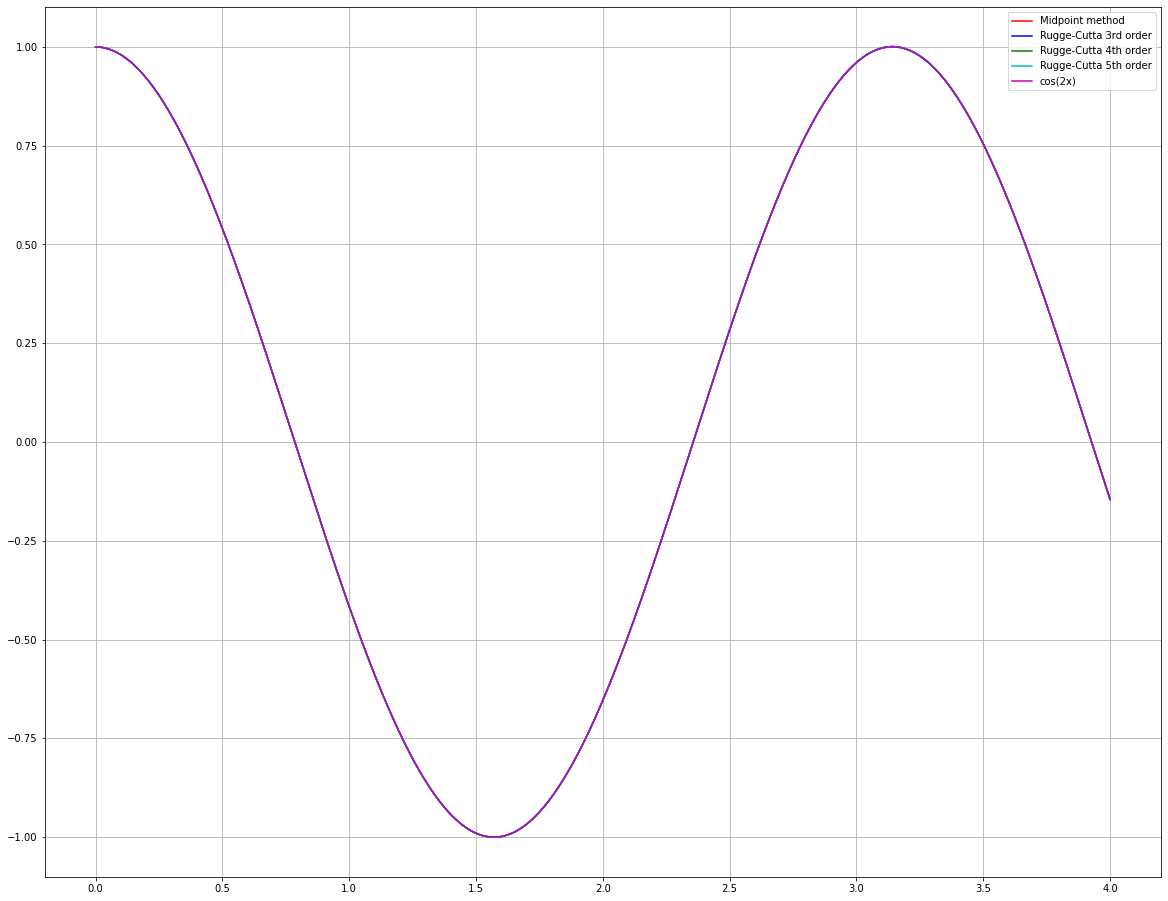

In [ ]:
plt.subplots(figsize = (20,16))
plt.plot(np.linspace(0, 4, 30000), ys, c='r', label="Midpoint method")
plt.plot(np.linspace(0, 4, 35300), ys3, c='b', label="Rugge-Cutta 3rd order")
plt.plot(np.linspace(0, 4, 35300), ys4, c='g', label="Rugge-Cutta 4th order")
plt.plot(np.linspace(0, 4, 36000), ys5, c='c', label="Rugge-Cutta 5th order")
plt.plot(np.linspace(0, 4, 36000), np.cos(2 * np.linspace(0, 4, 36000)), c='m', label="cos(2x)")

plt.grid()
plt.legend()
plt.show()

#Conclusion
To sum up, the midpoint method, despite being the simpliest one, took less iterations to give the needed accuracy. Also, the time needed for it to produce adequate solutions is 2 times less than the time required by other methods. The reason is less complex operations used for this method. <br>
However, if the task was to solve not an ordinary DE, this method wold fail, so probably, for simple Differential Equations we can use the Rugge-Cutta method of 2nd order (midpoint method), while for more complicated cases we need a higher order.